# 3D mode solver

big project

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pytrans.analysis import mode_solver as ms

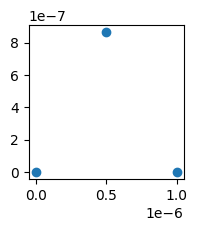

In [3]:
# test: three charges in a triangle

ll = 1e-6

X = np.asarray(
    [[0, 0, 0],
    [ll, 0, 0],
    [ll / 2, np.sqrt(3) / 2 * ll, 0],
    ], dtype=float
) 

fig, ax = plt.subplots(figsize=(2, 2))
ax.plot(X[:, 0], X[:, 1], 'o')

In [4]:
r_ab = ms.distances(X)

N, d = X.shape

r1 = np.empty((N, N, d))
for a in range(N):
    for b in range(N):
        for j in range(d):
            r1[a, b, j] = (X[a] - X[b])[j]


np.all(r1 == r_ab)

True

## Equilibrium positions in harmonic trap

In [5]:
from pytrans.analysis.mode_solver import HarmonicTrap

### Mixed species

Home 2013, Quantum Science and Metrology with Mixed-Species Ion Chains

In [29]:
from scipy.constants import elementary_charge, pi
from pytrans.ions import Ca40, Be9, Mg24

# define the trap for one species, get it for all of them!
trap = HarmonicTrap(fx=2.69e6, fy=11.19e6, fz=12.26e6, ion=Be9)
x0 = np.asarray((0, 0, 0)).reshape(1, 3)

for ion in [Ca40, Be9, Mg24]:
    rr = ms.mode_solver(trap, x0=x0, voltages=None, ions=ion, bounding_box=None)
    print(f"{ion}: {rr.mode_freqs * 1e-6}")


x0 = ms.init_crystal((0, 0, 0), dx=2.5e-6, n_ions=2)


ions = [Be9, Mg24]
# ions = [Be9, Be9]

rr = ms.mode_solver(trap, x0=x0, voltages=None, ions=ions, bounding_box=None)

print(rr)

masses = np.asarray([i.mass_amu for i in ions])
x_cm = np.einsum('maj,a->mj', rr.mode_vectors, masses) / masses.sum()

with np.printoptions(suppress=True):
    print(x_cm)






Ca40: [1.27742689 1.88276004 3.03367635]
Be9: [ 2.69 11.19 12.26]
Mg24: [1.64889363 3.72641682 4.82844869]
ModeSolverResults
  Freq               Be9                           Mg24
------  ------  --------  ----------  -------  --------  ----------
 1.904  0.3785   0         0           0.9256   0         0
 3.533  0       -0.02032  -8.649e-20   0        0.9998    4.532e-18
 4.036  0.9256   0         0          -0.3785   0         0
 4.681  0        0         0.01777     0        0        -0.9998
11.03   0       -0.9998   -2.267e-17   0       -0.02032   2.215e-16
12.11   0        0         0.9998      0        0         0.01777
[[ 0.7761804   0.          0.        ]
 [ 0.          0.72118465  0.        ]
 [-0.0222987   0.          0.        ]
 [ 0.          0.         -0.72191617]
 [ 0.         -0.28782971  0.        ]
 [ 0.          0.          0.28599001]]


In [18]:
0.6215**2 + 0.7834**2

0.9999778100000001

In [29]:
np.sqrt(Ca40.mass_amu / (Ca40.mass_amu + Be9.mass_amu))

0.9033195514963598

In [21]:
np.all(rr.hess == rr.minimize_result.hess)

True

In [22]:
np.all(rr.jac == rr.minimize_result.jac)

True

In [8]:
mr = Ca40.mass_amu / Be9.mass_amu

print(mr)
print(np.sqrt(mr))

4.434375388371061
2.10579566633875


In [36]:

# Mode shift of mixed-species crystal with radial field

trap = HarmonicTrap(2.69e6, 11.18e6, 12.26e6, ion=Be9, stray_field=[0, 200, 0])
x0 = np.asarray((0, 0, 0)).reshape(1, 3)

with np.printoptions(precision=3, suppress=True):
    for ion in [Be9, Mg24]:
        rr = ms.mode_solver(trap, x0=x0, voltages=None, ions=ion, bounding_box=None)
        print(rr)
        # print(f"{ion}")
        # print(f"  x0    {rr['x_eq'] * 1e6} um")
        # print(f"  freqs {rr['mode_freqs'] * 1e-6} MHz")
print()

x0 = ms.init_crystal((0, 0, 0), dx=2.5e-6, n_ions=2)
result = ms.mode_solver(trap, x0=x0, voltages=None, ions=[Be9, Mg24], bounding_box=None)

ix = 0
# with np.printoptions(precision=3, suppress=True):
print(result)
    # print(f"  x0\n{result['x_eq'] * 1e6} um")
    # print(f"Mode {ix}: {result['mode_freqs'][ix] * 1e-6:.3f} MHz")
    # print(result['mode_vectors'][ix])


ModeSolverResults
  Freq        Be9
------  --  -----  --
  2.69   1      0   0
 11.18   0      1   0
 12.26   0      0   1
ModeSolverResults
  Freq        Mg24
------  --  ------  --
 1.649   1       0   0
 3.719   0       1   0
 4.831   0       0   1

ModeSolverResults
  Freq                     Be9                                Mg24
------  ----------  ----------  ----------  ----------  ----------  ----------
 1.893  -0.3596      0.005288    2.403e-17  -0.9323     -0.03841    -2.642e-18
 3.42   -0.4496     -0.02711     6.413e-17   0.1369      0.8823     -1.491e-17
 4.038  -0.8173     -0.01744    -5.13e-17    0.3344     -0.4689      2.076e-17
 4.684   4.16e-18   -1.954e-19  -0.01778    -8.377e-18  -1.761e-19   0.9998
11.05    0.02455    -0.9995     -5.26e-16   -0.01448    -0.01596    -1.165e-17
12.11    1.564e-17  -1.012e-15   0.9998      1.543e-16   2.256e-17   0.01778


### From linear to zigzag

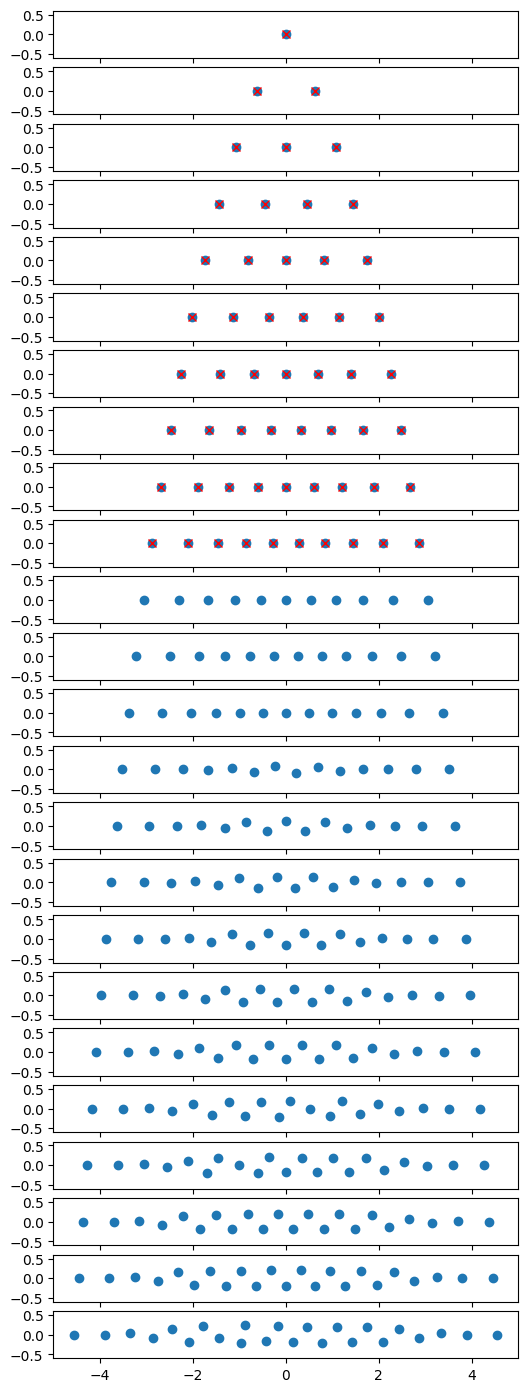

In [37]:

# from James98

scaled_equilibrium_positions = [
    [0.0],
    [-0.63, 0.63],
    [-1.0772, 0.0, 1.0772],
    [-1.4368, -0.4544, 0.4544, 1.4368],
    [-1.7429, -0.8221, -0.0, 0.8221, 1.7429],
    [-2.0123, -1.1361, -0.3699, 0.3699, 1.1361, 2.0123],
    [-2.2545, -1.4129, -0.6869, -0.0, 0.6869, 1.4129, 2.2545],
    [-2.4758, -1.6621, -0.967, -0.318, 0.318, 0.967, 1.6621, 2.4758],
    [-2.6803, -1.8897, -1.2195, -0.5996, -0.0, 0.5996, 1.2195, 1.8897, 2.6803],
    [-2.8708, -2.1001, -1.4503, -0.8538, -0.2823, 0.2823, 0.8538, 1.4503, 2.1001, 2.8708],
]


fx = 1e6
l_scale = (ms.kappa * elementary_charge / (Ca40.mass * (2 * pi * fx)**2))**(1 / 3)

trap = HarmonicTrap(fx, fy=6e6, fz=10e6, ion=Ca40)


N_max = 25
fig, axes = plt.subplots(N_max - 1, 1, figsize=(6, 0.7 * N_max), sharex=True, squeeze=False)

def solve_for_n_ions(trap, N_ions):
    dx = 2e-6
    x0 = ms.init_crystal((0, 0, 0), dx, N_ions)
    x0 += 1e-8 * np.random.randn(*x0.shape)
    result = ms.mode_solver(trap, x0=x0, voltages=None, ions=Ca40, bounding_box=None)
    return result, x0

for j, N_ions in enumerate(range(1, N_max)):

    result, x0 = solve_for_n_ions(trap, N_ions)
    
    x_eq = result.x_eq
    x_eq1 = x_eq[:, 0] / l_scale

    yy = x_eq[:, 1] / l_scale

    ax = axes[j, 0]
    # ax.plot(x0[:, 0] / l_scale, x0[:, 1] / l_scale, 'o', color='lightgray')
    ax.plot(x_eq1, yy, 'o')
    try:
        ax.plot(scaled_equilibrium_positions[j], np.zeros((N_ions)), 'xr', ms=6)
    except IndexError:
        pass
    ax.set_ylim(-0.6, 0.6)
# ax.invert_yaxis()

# result['res']

## Normal modes of 100 ions in harmonic trap

In [38]:
wx, wy, wz = 0.1e6, 6.5e6, 10e6
trap_freqs = np.asarray([wx, wy, wz])

trap = HarmonicTrap(wx, wy, wz, ion=Ca40)
result, _ = solve_for_n_ions(trap, 100)


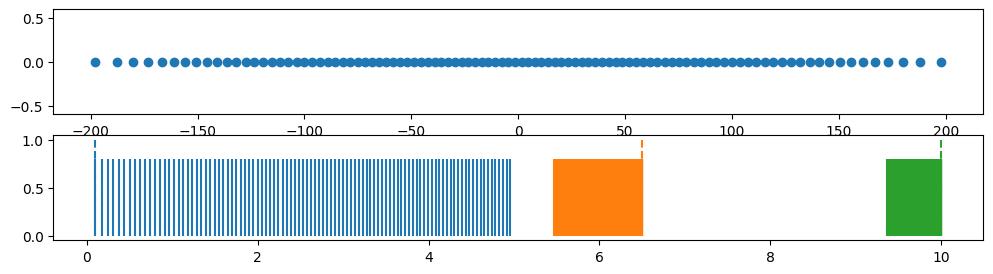

In [39]:
fig, (ax0, ax) = plt.subplots(2, 1, figsize=(12, 3))


mode_freqs = result.mode_freqs
mode_vectors = result.mode_vectors
x_eq = result.x_eq

ax0.plot(x_eq[:, 0] * 1e6, x_eq[:, 1] * 1e6, 'o')
ax0.set_ylim(-0.6, 0.6)

# projections of normal modes on single-ion eigenmodes
v1 = np.eye(3)
proj = abs(np.einsum('Mai,im', mode_vectors, v1)).sum(1)
mode1_index = np.argmax(proj, axis=1)

colors = np.asarray(['k'] * len(mode_freqs), dtype=object)
for j in range(3):
    colors[np.where(mode1_index == j)] = f"C{j}"


ax.vlines(mode_freqs * 1e-6, 0, 0.8, colors=colors)
ax.vlines(trap_freqs * 1e-6, 0, 1, colors=[f"C{j}" for j in range(3)], linestyle='--');




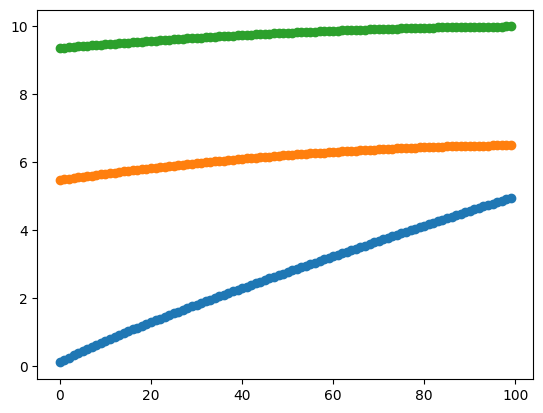

In [40]:
for j in range(3):
    plt.plot(mode_freqs[np.where(mode1_index == j)] * 1e-6, 'o')

# Mixed-species mode participation

In [41]:
# from pytrans.ions import Be9
# ions = [Ca40, Be9]

# x0 = ms.init_crystal((0, 0, 0), dx=3e-6, n_ions=len(ions))
# x0 += 1e-8 * np.random.randn(*x0.shape)
# result = ms.mode_solver(trap, x0=x0, voltages=None, ions=ions, bounding_box=None)

# # v = result['mode_vectors']

In [15]:
# fig = plt.figure(figsize=(12, 4))
# gs = fig.add_gridspec(2, 2, hspace=0.4)

# ax_xy = fig.add_subplot(gs[0, 1])
# ax_zy = fig.add_subplot(gs[0, 0])
# ax = fig.add_subplot(gs[1, :])



# mode_freqs = result['mode_freqs']
# mode_vectors = result['mode_vectors']
# x_eq = result['x_eq']

# ax_xy.plot(x_eq[:, 0] * 1e6, x_eq[:, 1] * 1e6, 'o')
# ax_xy.plot(res_pot['x'] * 1e6, res_pot['y'] * 1e6, 'xr', ms=8)

# ax_zy.plot(x_eq[:, 2] * 1e6, x_eq[:, 1] * 1e6, 'o')
# ax_zy.plot(res_pot['z'] * 1e6, res_pot['y'] * 1e6, 'xr', ms=8)

# ax_xy.set(xlabel='x', ylabel='y')
# ax_zy.set(xlabel='z', ylabel='y')

# # projections of normal modes on single-ion eigenmodes
# proj = abs(np.einsum('Mai,im', mode_vectors, res_pot['eigenvectors'])).sum(1)
# mode1_index = np.argmax(proj, axis=1)

# colors = np.asarray(['k'] * len(mode_freqs), dtype=object)
# for j in range(3):
#     colors[np.where(mode1_index == j)] = f"C{j}"

# ax.vlines(mode_freqs * 1e-6, 0, 0.8, colors=colors)
# ax.vlines(res_pot['freqs'] * 1e-6, 0, 1, colors=[f"C{j}" for j in range(3)], linestyle='--');



# Solver and trap model

Loading interpolators: 100%|██████████| 13/13 [00:03<00:00,  3.67it/s]


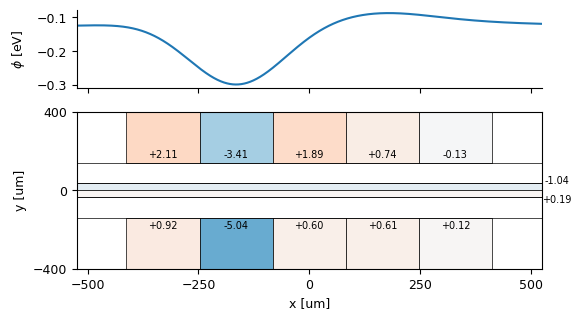

In [42]:
from models.surface_trap import SurfaceTrap
from models.surface_trap.plot import plot_voltages_on_trap
from pytrans.ions import Ca40, Be9


trap = SurfaceTrap()
voltages = np.array([-1.03680679,  0.19411571,  2.10824776, -3.40701046,  1.88571987,
        0.73699269, -0.12520335,  0.91544312, -5.0391288 ,  0.59976997,
        0.60904511,  0.12365927])

_ = plot_voltages_on_trap(trap, voltages)


--------------
Analyse potential for ion Ca40: 
Exec minimize
- minimize elapsed time: 51.349 ms
Potential mimimum [um]
[-1.65004747e+02  2.36913530e-02  6.97660839e+01]
Gradient [V/m]
[-0.11704776 -0.62067761 -5.16692653]
Displacement at 1 MHz [um]
[-0.00715832 -0.03795893 -0.315995  ]
Hessian [V/m2]
[[1.63271660e+07 1.66442026e+05 1.30036549e+05]
 [1.66442026e+05 4.69879188e+08 4.99570320e+07]
 [1.30036549e+05 4.99570320e+07 3.82846303e+08]]
Normal mode frequencies [MHz]
[0.999259 5.48881 4.6929]
Eigenvectors
[[1 -0.000431 0.000144]
 [-0.000333 -0.91 -0.414]
 [-0.000309 -0.414 0.91]]
Tilt angle of mode 2 (4.69): 114.47°



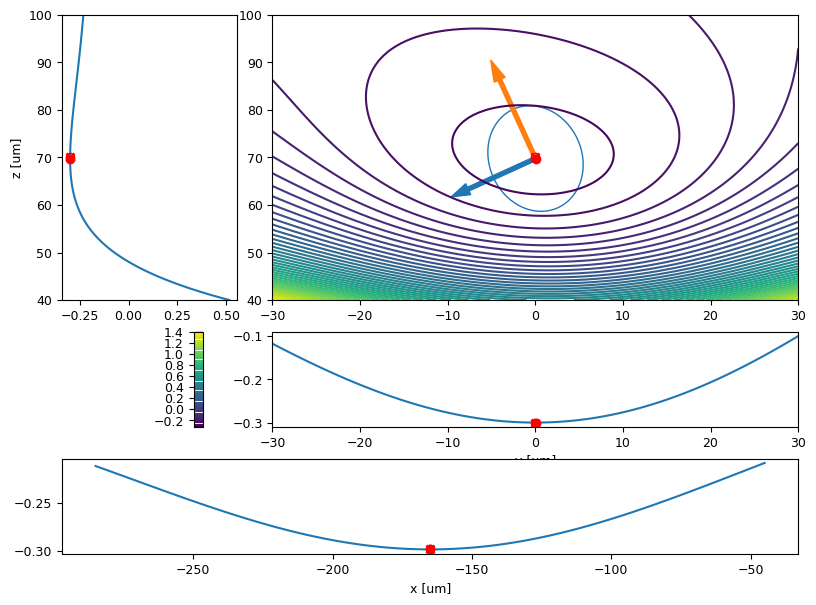

In [43]:
from pytrans.analysis import analyse_potential

r0 = (trap.x_ele(2), 0, trap.z0)

res_pot = analyse_potential(trap, voltages, ion=Ca40, r0=r0, roi=(120, 30, 30), find_3dmin=True, minimize_options=dict(accuracy=1e-8))


In [44]:
n_ions = 3

x0 = ms.init_crystal(r0, dx=3e-6, n_ions=n_ions)
x0 += 1e-8 * np.random.randn(*x0.shape)
print(x0)
result = ms.mode_solver(trap, x0=x0, voltages=voltages, ions=[Ca40, Ca40, Ca40], bounding_box=None)

[[-1.69504457e-04 -1.06696950e-08  6.99867914e-05]
 [-1.64998421e-04 -7.96010170e-09  7.00072301e-05]
 [-1.60500468e-04 -7.93681945e-09  6.99978896e-05]]


In [48]:
result.minimize_result

 message: Converged (|f_n-f_(n-1)| ~= 0)
 success: True
  status: 1
     fun: -0.8952415832464565
       x: [-1.698e-04  2.607e-08  6.978e-05 -1.650e-04  2.352e-08
            6.978e-05 -1.602e-04  2.288e-08  6.977e-05]
     nit: 6
     jac: [-3.037e-03 -4.596e-04  6.067e-03  3.139e-03  1.068e-02
           -1.046e-02 -1.014e-03  5.116e-03  1.740e-02]
    nfev: 23
    hess: [[ 4.533e+07  2.474e+05 ...  1.614e+03  1.508e+03]
           [ 2.474e+05  4.552e+08 ...  1.624e+06 -4.997e-01]
           ...
           [ 1.614e+03  1.624e+06 ...  4.551e+08  4.996e+07]
           [ 1.508e+03 -4.997e-01 ...  4.996e+07  3.665e+08]]

In [45]:
res_pot['r1'] * 1e6
res_pot['z']

6.976608388725277e-05

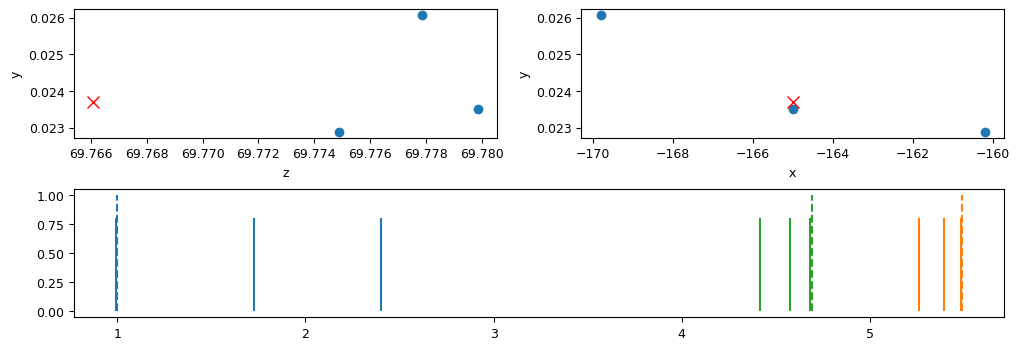

In [46]:
fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(2, 2, hspace=0.4)

ax_xy = fig.add_subplot(gs[0, 1])
ax_zy = fig.add_subplot(gs[0, 0])
ax = fig.add_subplot(gs[1, :])



mode_freqs = result.mode_freqs
mode_vectors = result.mode_vectors
x_eq = result.x_eq

ax_xy.plot(x_eq[:, 0] * 1e6, x_eq[:, 1] * 1e6, 'o')
ax_xy.plot(res_pot['x'] * 1e6, res_pot['y'] * 1e6, 'xr', ms=8)

ax_zy.plot(x_eq[:, 2] * 1e6, x_eq[:, 1] * 1e6, 'o')
ax_zy.plot(res_pot['z'] * 1e6, res_pot['y'] * 1e6, 'xr', ms=8)

ax_xy.set(xlabel='x', ylabel='y')
ax_zy.set(xlabel='z', ylabel='y')

# projections of normal modes on single-ion eigenmodes
proj = abs(np.einsum('Mai,im', mode_vectors, res_pot['eigenvectors'])).sum(1)
mode1_index = np.argmax(proj, axis=1)

colors = np.asarray(['k'] * len(mode_freqs), dtype=object)
for j in range(3):
    colors[np.where(mode1_index == j)] = f"C{j}"

ax.vlines(mode_freqs * 1e-6, 0, 0.8, colors=colors)
ax.vlines(res_pot['freqs'] * 1e-6, 0, 1, colors=[f"C{j}" for j in range(3)], linestyle='--');



## Real waveform from segtrap

In [122]:
from model import Segtrap

In [123]:
dac_channel_transform = list(map(abs, np.array([0, 15, 3, 18, 1, 16, 4, 19, 2, 17, 5, 20, -7, 14, 6, 21,
                                  11, 26, 7, 22, 12, 27, 8, 23, 13, 28, 9, 24, -22, 29, 10, 25])))

import json
with open("../waveforms/load_split_BeCa_2022_09_28_v03_MM_comp_deaths_many_new_transports.dwc.json", 'r') as f:
    wfs = json.load(f)
samples = np.asarray(wfs['wav5']['samples'])


segtrap = Segtrap()

voltages = np.zeros((segtrap.n_electrodes,))
for i in range(len(voltages)):
    voltages[dac_channel_transform[i]] = samples[i, 0]

--------------
Analyse potential: 
Exec minimize
- minimize elapsed time: 325.562 ms
Potential mimimum [um]
[ 2.67593603e+01  1.69174743e-03 -3.04274459e-03]
Gradient [V/m]
[-0.3281834  -7.41232306 10.82874629]
Hessian [V/m2]
[[ 3.51512780e+07 -6.50005367e+04  6.04711991e+03]
 [-6.50005367e+04  1.08870372e+08  7.96888207e+07]
 [ 6.04711991e+03  7.96888207e+07  1.69242208e+08]]
Normal mode frequencies for Ca40 [MHz]
[1.4662 1.81462 3.70348]
Eigenvectors
[[-1 -0.00305 -0.000169]
 [-0.0026 0.823 0.568]
 [0.00159 -0.568 0.823]]
Tilt angle of mode 2 (3.70): 55.37°



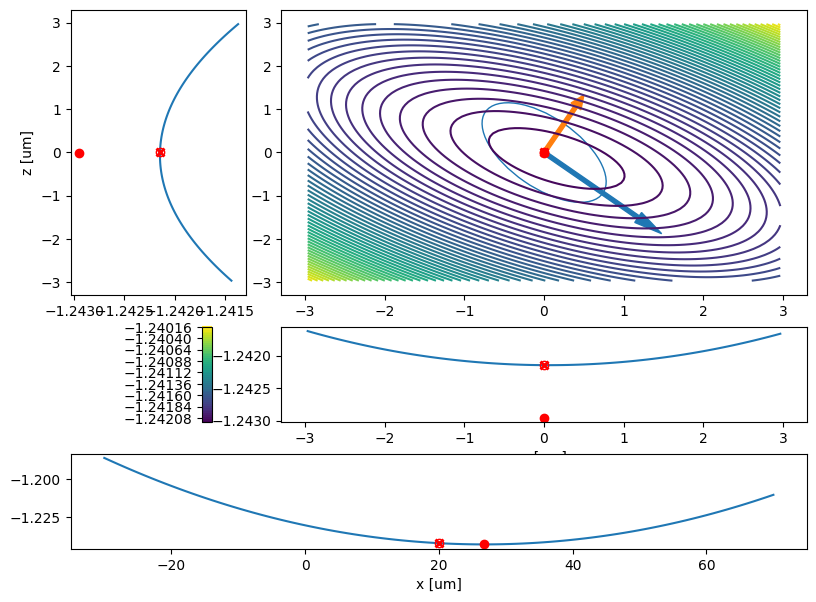

In [260]:
from pytrans.analysis import analyse_potential

res_pot = analyse_potential(segtrap, voltages, r0=(20e-6, 0, 0), roi=(50, 3.3, 3.3), find_3dmin=True, minimize_options=dict(xtol=1e-7))


In [272]:
N_ions = 2
dx = 4e-6
x0 = np.zeros((N_ions, 3), dtype=float)
x0[:, 0] = np.linspace(-N_ions / 2 * dx, N_ions / 2 * dx, N_ions) + res_pot['x']
x0 += 1e-8 * np.random.randn(*x0.shape)

result = mode_solver(segtrap, x0=x0, voltages=voltages, minimize_options=dict(xtol=1e-7))


In [269]:
result['res']

     fun: -2.485414064820236
     jac: array([ 0.00264512, -0.05589397, -0.24571129, -0.01661429,  0.19337403,
        0.1675134 ])
 message: 'Converged (|x_n-x_(n-1)| ~= 0)'
    nfev: 13
     nit: 3
  status: 2
 success: True
       x: array([ 2.46144039e-05,  1.31111303e-07, -1.22842846e-07,  2.89568729e-05,
        2.34952975e-07, -1.83617825e-07])

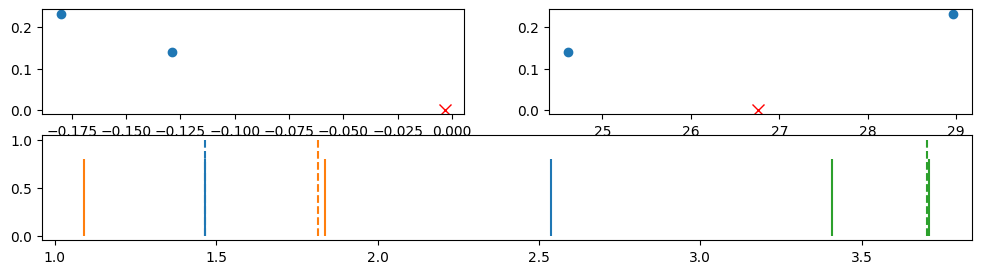

In [273]:
fig = plt.figure(figsize=(12, 3))
gs = fig.add_gridspec(2, 2)

ax_xy = fig.add_subplot(gs[0, 1])
ax_zy = fig.add_subplot(gs[0, 0])
ax = fig.add_subplot(gs[1, :])



mode_freqs = result['mode_freqs']
mode_vectors = result['mode_vectors']
x_eq = result['x_eq']

ax_xy.plot(x_eq[:, 0] * 1e6, x_eq[:, 1] * 1e6, 'o')
ax_xy.plot(res_pot['x'] * 1e6, res_pot['y'] * 1e6, 'xr', ms=8)

ax_zy.plot(x_eq[:, 2] * 1e6, x_eq[:, 1] * 1e6, 'o')
ax_zy.plot(res_pot['z'] * 1e6, res_pot['y'] * 1e6, 'xr', ms=8)

# projections of normal modes on single-ion eigenmodes
proj = abs(np.einsum('Mai,im', mode_vectors, res_pot['eigenvectors'])).sum(1)
mode1_index = np.argmax(proj, axis=1)

colors = np.asarray(['k'] * len(mode_freqs), dtype=object)
for j in range(3):
    colors[np.where(mode1_index == j)] = f"C{j}"

ax.vlines(mode_freqs * 1e-6, 0, 0.8, colors=colors)
ax.vlines(res_pot['freqs'] * 1e-6, 0, 1, colors=[f"C{j}" for j in range(3)], linestyle='--');

